In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import jax.numpy as jnp 
from jax import random

from sgmcmcjax.samplers import build_sgld_sampler


# Build a sampler function

In this series of notebooks we use logistic regression as the example. However the usage is exactly the same for other models.

In [3]:
# import model and create dataset
from sgmcmcjax.models.logistic_regression import gen_data, loglikelihood, logprior

key = random.PRNGKey(42)
dim = 10
Ndata = 100000 

theta_true, X, y_data = gen_data(key, dim, Ndata)

data = (X, y_data)

generating data, with N=100000 and dim=10


## SGLD sampler

Just like in the logistic regression example notebook, we can simply create a sampler function given some hyperparameters such as step size and batch size

In [10]:
batch_size = int(0.01*X.shape[0])
dt = 1e-5

my_sampler = build_sgld_sampler(dt, loglikelihood, logprior, data, batch_size, pbar=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

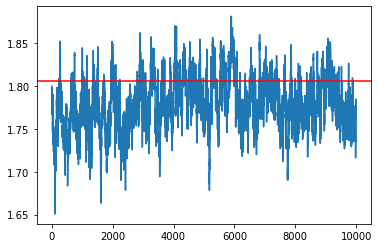

In [11]:
# Run sampler
key = random.PRNGKey(0)
Nsamples = 10000
samples = my_sampler(key, Nsamples, theta_true)

idx = 7
plt.plot(np.array(samples)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()

## Other samplers

There are several available samplers:

- sgld
- sgld-cv
- svrg-sgld
- sghmc
- sghmc-cv
- svrg-sghmc
- psgld

Their usage is very similar to sgld

In [10]:
from sgmcmcjax.samplers import build_sgldCV_sampler, build_sgld_SVRG_sampler, build_psgld_sampler
from sgmcmcjax.samplers import build_sghmc_sampler, build_sghmcCV_sampler, build_sghmc_SVRG_sampler
from sgmcmcjax.samplers import build_baoab_sampler, build_sgnht_sampler, build_badodab_sampler
from sgmcmcjax.samplers import build_sgnhtCV_sampler, build_badodabCV_sampler

In [24]:
data = (X, y_data)

key = random.PRNGKey(0)
Nsamples = 10000


#### SGLD-CV

  0%|          | 0/10000 [00:00<?, ?it/s]

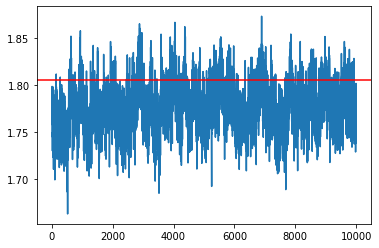

In [25]:
my_sampler = build_sgldCV_sampler(1e-4, loglikelihood, logprior, data, batch_size, theta_true)
samples = my_sampler(key, Nsamples, theta_true)

idx = 7
plt.plot(np.array(samples)[:,idx])
plt.axhline(theta_true[idx], c='r')
plt.show()

#### SVRG-sgld

  0%|          | 0/10000 [00:00<?, ?it/s]

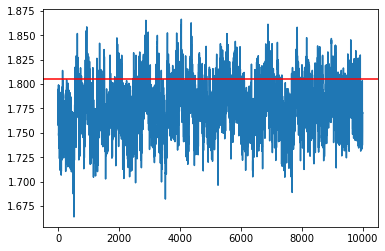

In [27]:
update_rate = 100
my_sampler = build_sgld_SVRG_sampler(1e-4, loglikelihood, logprior, data, batch_size, update_rate)
samples = my_sampler(key, Nsamples, theta_true)

idx = 7
plt.plot(np.array(samples)[:,idx])
plt.axhline(theta_true[idx], c='r')
plt.show()

#### SGHMC

  0%|          | 0/10000 [00:00<?, ?it/s]

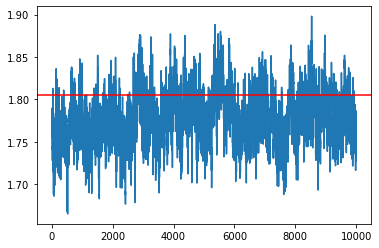

In [29]:
L = 10
# batch_size = int(0.01*X.shape[0])
my_sampler = build_sghmc_sampler(1e-6, L, loglikelihood, logprior, data, batch_size)
samples = my_sampler(key, Nsamples, theta_true)

idx = 7
plt.plot(np.array(samples)[:,idx])
plt.axhline(theta_true[idx], c='r')
plt.show()

#### SGHMC-CV

  0%|          | 0/10000 [00:00<?, ?it/s]

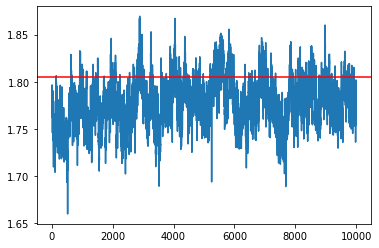

In [30]:
L = 10
my_sampler = build_sghmcCV_sampler(1e-6, L, loglikelihood, logprior, data, batch_size, theta_true)
samples = my_sampler(key, Nsamples, theta_true)

idx = 7
plt.plot(np.array(samples)[:,idx])
plt.axhline(theta_true[idx], c='r')
plt.show()

#### SGHMC-SVRG

  0%|          | 0/10000 [00:00<?, ?it/s]

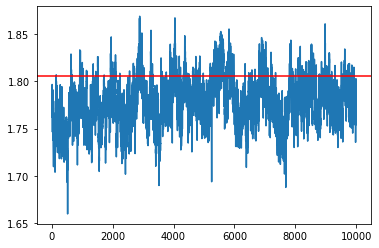

In [31]:
L = 10
update_rate = 1000
my_sampler = build_sghmc_SVRG_sampler(1e-6, L, loglikelihood, logprior, data, batch_size, update_rate)
samples = my_sampler(key, Nsamples, theta_true)

idx = 7
plt.plot(np.array(samples)[:,idx])
plt.axhline(theta_true[idx], c='r')
plt.show()

#### pSGLD

  0%|          | 0/10000 [00:00<?, ?it/s]

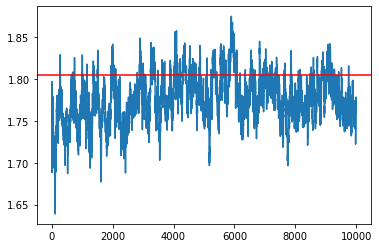

In [32]:
my_sampler = build_psgld_sampler(1e-2, loglikelihood, logprior, data, batch_size)
samples = my_sampler(key, Nsamples, theta_true)

idx = 7
plt.plot(np.array(samples)[:,idx])
plt.axhline(theta_true[idx], c='r')
plt.show()

#### BAOAB

  0%|          | 0/10000 [00:00<?, ?it/s]

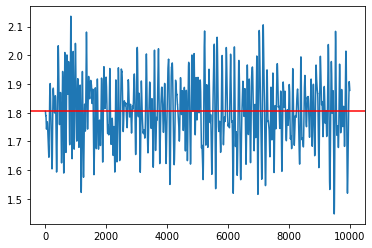

In [33]:
gamma = 5
my_sampler = build_baoab_sampler(1e-3, gamma, loglikelihood, logprior, data, batch_size)
samples = my_sampler(key, Nsamples, theta_true)

idx = 7
plt.plot(np.array(samples)[:,idx])
plt.axhline(theta_true[idx], c='r')
plt.show()

#### SGNHT 

  0%|          | 0/10000 [00:00<?, ?it/s]

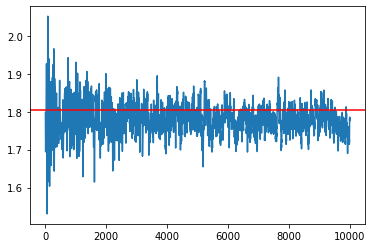

In [34]:
my_sampler = build_sgnht_sampler(1e-5, loglikelihood, logprior, data, batch_size)
samples = my_sampler(key, Nsamples, theta_true)

idx = 7
plt.plot(np.array(samples)[:,idx])
plt.axhline(theta_true[idx], c='r')
plt.show()

#### SGNHT-CV

  0%|          | 0/10000 [00:00<?, ?it/s]

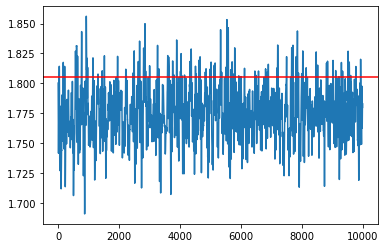

In [35]:
my_sampler = build_sgnhtCV_sampler(1e-5, loglikelihood, logprior, data, batch_size, theta_true)
samples = my_sampler(key, Nsamples, theta_true)

idx = 7
plt.plot(np.array(samples)[:,idx])
plt.axhline(theta_true[idx], c='r')
plt.show()

#### BADODAB

  0%|          | 0/10000 [00:00<?, ?it/s]

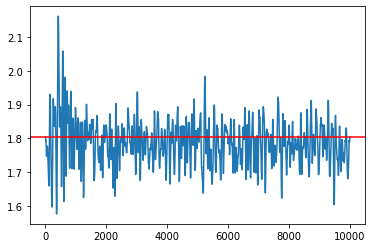

In [36]:
my_sampler = build_badodab_sampler(1e-3, loglikelihood, logprior, data, batch_size)
samples = my_sampler(key, Nsamples, theta_true)

idx = 7
plt.plot(np.array(samples)[:,idx])
plt.axhline(theta_true[idx], c='r')
plt.show()

#### BADODAB-CV

  0%|          | 0/10000 [00:00<?, ?it/s]

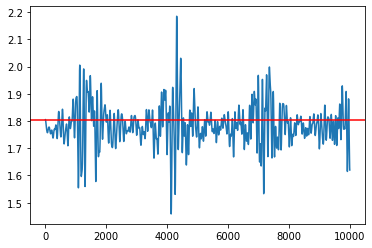

In [37]:
my_sampler = build_badodabCV_sampler(1e-3, loglikelihood, logprior, data, batch_size, theta_true)
samples = my_sampler(key, Nsamples, theta_true)

idx = 7
plt.plot(np.array(samples)[:,idx])
plt.axhline(theta_true[idx], c='r')
plt.show()